### **Multiclass Classification with NeuroScope** 
Multiclass classification example using NeuroScope with comprehensive
diagnostic analysis. Demonstrates softmax output activation, categorical crossentropy loss, and specialized multiclass metrics.

This example covers:
- Multiclass classification setup
- Softmax activation and BCE loss
- Multiclass-specific metrics and diagnostics
- Optimization and informed training
---
**Author:** Ahmad Raza | **Date:** September 2025


#### **Step 1: Import NeuroScope Components**

Same toolkit as before, but we'll use them for a more challenging multiclass problem.

In [1]:
# Necessary imports
import numpy as np
from neuroscope import (
    MLP, 
    PreTrainingAnalyzer, 
    TrainingMonitor, 
    PostTrainingEvaluator, 
    Visualizer
)

#### **Step 2: Data Generation Functions**

We'll reuse our flexible data generation function, but this time create three distinct classes.

In [2]:
# Generate synthetic data
def generate_synthetic_data(samples, features=20, classes=None, noise=0.1, random_state=None):
    """Generate synthetic data for classification or regression."""
    rng = np.random.default_rng(random_state)

    if classes is None:
        X = rng.normal(0, 1, size=(samples, features))
        weights = rng.normal(0, 1, size=(features, 1))
        y = X @ weights + noise * rng.normal(0, 1, size=(samples, 1))
        y = y.squeeze()
    else:
        X = rng.normal(0, 1, size=(samples, features))
        weights = rng.normal(0, 1, size=(classes, features))
        logits = X @ weights.T + noise * rng.normal(0, 1, size=(samples, classes))
        y = np.argmax(logits, axis=1)
    
    return X, y
    

In [3]:
# Split data into train, validation, and test sets
def split_data(X, y, train_ratio=0.7, val_ratio=0.15):
    """Split data into train, validation, and test sets."""
    n_samples = X.shape[0]
    n_train = int(n_samples * train_ratio)
    n_val = int(n_samples * val_ratio)

    # Shuffle indices
    indices = np.random.permutation(n_samples)

    # Split indices
    train_idx = indices[:n_train]
    val_idx = indices[n_train : n_train + n_val]
    test_idx = indices[n_train + n_val :]

    return (
        X[train_idx],
        y[train_idx],
        X[val_idx],
        y[val_idx],
        X[test_idx],
        y[test_idx],
    )

#### **Step 3: Create Our Dataset**

Now we're creating a 3-class problem. Notice the increased noise level - multiclass problems are inherently more challenging.

In [4]:
# Generate synthetic multi-class classification data
X, y = generate_synthetic_data(samples=2000, features=20, classes=3, noise=0.2, random_state=42)
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y)

#### **Step 4: Verify Data Shapes**
Always check your data dimensions to catch potential issues early. This helps prevent mysterious errors later!

In [5]:
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print(f"Training samples per class: {np.bincount(y_train)}")

Dataset shape: (2000, 20)
Number of classes: 3
Class distribution: [646 613 741]
Training samples per class: [457 417 526]


#### **Step 5: Design Your Neural Network**

For binary classification, we need:
- **Input layer:** 20 neurons (matching our features)
- **Hidden layers:** 20 → 10 neurons (learning complex patterns)
- **Output layer:** 3 neuron (one per class) with softmax activation (probability output)

In [6]:
# initialize model
model = MLP(
        layer_dims=[20, 20, 10, 3],  # Input -> Hidden -> Hidden -> Output
        hidden_activation="leaky_relu",  # Leaky ReLU for hidden layers
        out_activation="softmax",  # Softmax for multi-class classification
        init_method="smart",  # Smart initialization for ReLU
        dropout_rate=0.1,  # 10% dropout for regularization
    )


#### **Step 6: Compile the model**

Let's set up our optimizer and regularization in this step.

In [7]:
# Compile the model
model.compile(
        optimizer="adam",  # Adam optimizer
        lr=1e-3,  # Learning rate
        reg="l2",  # L2 regularization
        lamda=1e-3,  # Regularization strength
    )

                    MLP ARCHITECTURE SUMMARY
Layer        Type               Output Shape    Params    
---------------------------------------------------------------
Layer 1      Input → Hidden     (20,)           420       
Layer 2      Hidden → Hidden    (10,)           210       
Layer 3      Hidden → Output    (3,)            33        
---------------------------------------------------------------
TOTAL                                           663       
Hidden Activation                               leaky_relu
Output Activation                               softmax
Optimizer                                       Adam
Learning Rate                                   0.001
Dropout                                         10.0% (normal)
L2 Regularization                               λ = 0.001


#### **Step 7: Pre-Training Analysis**

NeuroScope's pre-training analyzer performs comprehensive checks before training begins. This catches potential issues that could derail training.

In [8]:
# Pre-training analysis
analyzer = PreTrainingAnalyzer(model)
analyzer.analyze(X_train, y_train)

                         NEUROSCOPE PRE-TRAINING ANALYSIS
DIAGNOSTIC TOOL             STATUS       RESULT         NOTE                                      
------------------------------------------------------------------------------------------
Initial Loss Check          PASS         1.6301         Acceptable loss range                     
Initialization Validation   PASS         3 layers       Good weight init                          
Layer Capacity Analysis     PASS         663 params     No bottlenecks                            
Architecture Sanity Check   PASS         0I/0W          Architecture is fine                      
Capacity vs Data Ratio      PASS         663 params     Excellent model size                      
Convergence Feasibility     PASS         66.7%          Good convergence potential                
------------------------------------------------------------------------------------------
OVERALL STATUS: ALL SYSTEMS READY
TESTS PASSED: 6/6


#### **Step 8: Training with Real-Time Monitoring**

Now let's train with NeuroScope's advanced monitoring. Watch the diagnostic indicators carefully! Multiclass problems show more complex training dynamics with multiple competing outputs.

In [9]:
# Train the model with monitoring
monitor = TrainingMonitor()
history = model.fit(
        X_train,
        y_train,
        X_val=X_val,
        y_val=y_val,
        epochs=40,
        batch_size=32,
        monitor=monitor
    )


----------------------------------------------------------------------------------------------------
SNR: 🟡 (0.75),     | Dead Neurons: 🟢 (0.00%)  | VGP:      🟢  | EGP:     🟢  | Weight Health: 🟢
WUR: 🟢 (1.31e-03)  | Saturation:   🟢 (0.00)   | Progress: 🟢  | Plateau: 🟢  | Overfitting:   🟡
----------------------------------------------------------------------------------------------------
Epoch   1  Train loss: 1.191123, Train Accuracy: 0.4164 Val loss: 1.2986967, Val Accuracy: 0.37000
----------------------------------------------------------------------------------------------------
SNR: 🟡 (0.83),     | Dead Neurons: 🟢 (0.00%)  | VGP:      🟢  | EGP:     🟢  | Weight Health: 🟢
WUR: 🟢 (1.04e-03)  | Saturation:   🟢 (0.00)   | Progress: 🟢  | Plateau: 🟢  | Overfitting:   🟢
----------------------------------------------------------------------------------------------------
Epoch   2  Train loss: 0.996201, Train Accuracy: 0.5093 Val loss: 1.0965829, Val Accuracy: 0.44667
----------------------

#### **Step 9: Visualize Training Progress**

NeuroScope's visualizer creates high quality plots. The learning curves show how loss decreases and accuracy improves over time.

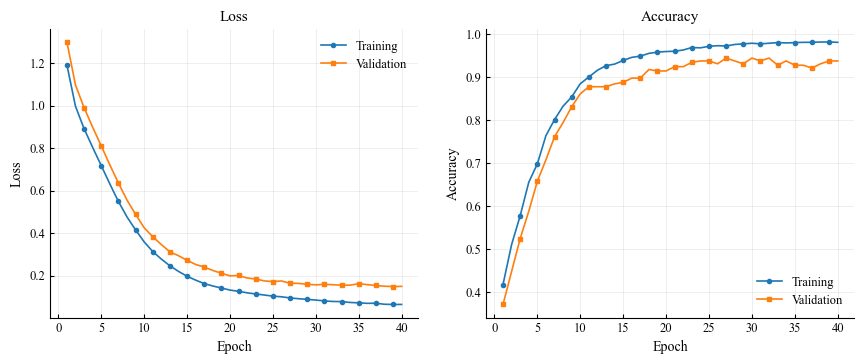

In [10]:
# Visualize training progress
viz = Visualizer(history)
viz.plot_learning_curves()

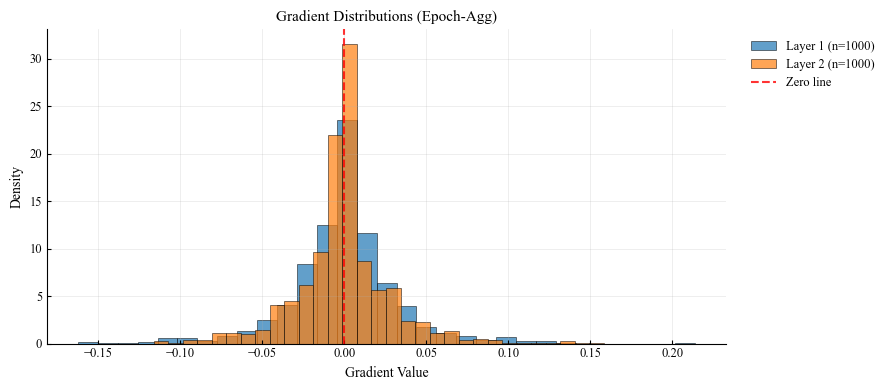

In [11]:
# Visualize gradient histogram
viz.plot_gradient_hist()

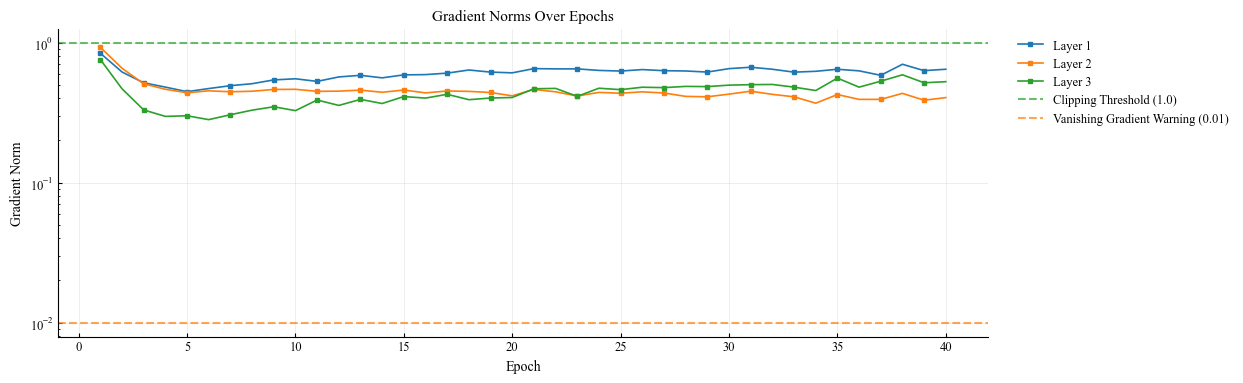

In [12]:
# visualize gradient norms with reference lines
viz.plot_gradient_norms(reference_lines=True)

#### **Step 10: Final Model Evaluation**

Time for the moment of truth! Let's see how well our model performs on completely unseen test data.

In [13]:
# Post-training evaluation
evaluator = PostTrainingEvaluator(model)
evaluator.evaluate(X_test, y_test)

                  NEUROSCOPE POST-TRAINING EVALUATION
EVALUATION      STATUS       SCORE        NOTE                                         
--------------------------------------------------------------------------------
Robustness      EXCELLENT    0.976        Highly robust to noise                       
Performance     EXCELLENT    0.940        High accuracy and fast inference             
Stability       PASS         0.610        Good prediction stability                    
--------------------------------------------------------------------------------
OVERALL STATUS: EVALUATION COMPLETE
EVALUATIONS PASSED: 3/3
                     CLASSIFICATION METRICS
METRIC               STATUS       SCORE        NOTE                                    
--------------------------------------------------------------------------------
Accuracy             PASS         0.9400       Good performance                        
Precision            PASS         0.9402       Good performance        

### **Excellent Progress!**

You've mastered multiclass classification with NeuroScope!

#### **Key Concepts Learned:**
- Multiclass architecture design
- Softmax activation for probability distributions
- Advanced monitoring and diagnostics
- Understanding prediction confidence

#### **What's Different from Binary?**
- **Multiple outputs:** Each class gets its own neuron
- **Softmax activation:** Ensures probabilities sum to 1
- **Richer metrics:** Per-class performance analysis
- **Complex dynamics:** Multiple competing objectives

#### **Next Challenge:**
Ready to try **Regression** problems? They're completely different but equally fascinating!

**Keep exploring!** 